<a href="https://colab.research.google.com/github/mjrjahid/DYSLEXIA-DETECTION-USING-CLASSICAL-MACHINE-LEARNING-CLASSIFIERS/blob/main/Leakage-Safe%20Feature%20Selection%20%2B%20Permutation-Based%20Explanations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================
# 🔹 Step 1: Import libraries
# ==============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ==============================
# 🔹 Step 2: Load dataset
# ==============================
# (Assumes you’ve uploaded Dyt-desktop.csv in Colab)
# Make sure to mount your Google Drive to access the file.
df = pd.read_csv('/content/drive/MyDrive/Colab file/Assignment-1 for 691/Dyt-desktop.csv', sep=';')

print("Desktop dataset shape:", df.shape)

Desktop dataset shape: (3644, 197)


In [ ]:
# Inspect first few rows and columns
print("Columns in dataset:\n", df.columns.tolist())
print("\nFirst few rows:\n")
print(df.head())

Columns in dataset:
 ['Gender', 'Nativelang', 'Otherlang', 'Age', 'Clicks1', 'Hits1', 'Misses1', 'Score1', 'Accuracy1', 'Missrate1', 'Clicks2', 'Hits2', 'Misses2', 'Score2', 'Accuracy2', 'Missrate2', 'Clicks3', 'Hits3', 'Misses3', 'Score3', 'Accuracy3', 'Missrate3', 'Clicks4', 'Hits4', 'Misses4', 'Score4', 'Accuracy4', 'Missrate4', 'Clicks5', 'Hits5', 'Misses5', 'Score5', 'Accuracy5', 'Missrate5', 'Clicks6', 'Hits6', 'Misses6', 'Score6', 'Accuracy6', 'Missrate6', 'Clicks7', 'Hits7', 'Misses7', 'Score7', 'Accuracy7', 'Missrate7', 'Clicks8', 'Hits8', 'Misses8', 'Score8', 'Accuracy8', 'Missrate8', 'Clicks9', 'Hits9', 'Misses9', 'Score9', 'Accuracy9', 'Missrate9', 'Clicks10', 'Hits10', 'Misses10', 'Score10', 'Accuracy10', 'Missrate10', 'Clicks11', 'Hits11', 'Misses11', 'Score11', 'Accuracy11', 'Missrate11', 'Clicks12', 'Hits12', 'Misses12', 'Score12', 'Accuracy12', 'Missrate12', 'Clicks13', 'Hits13', 'Misses13', 'Score13', 'Accuracy13', 'Missrate13', 'Clicks14', 'Hits14', 'Misses14', 'Scor

In [ ]:
# Read the data correctly (semicolon-separated)
df = pd.read_csv('/content/drive/MyDrive/Colab file/Assignment-1 for 691/Dyt-desktop.csv', sep=';')

# Target column
target_col = 'Dyslexia'

X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# ==============================
# 🔹 Step 3: Inspect and prepare data
# ==============================
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Replace this with your actual target column name
target_col = 'Dyslexia'

X = df.drop(columns=[target_col])
y = df[target_col]

# If categorical features exist, encode them
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by filling with the mean
X = X.fillna(X.mean())


Columns:
 Index(['Gender', 'Nativelang', 'Otherlang', 'Age', 'Clicks1', 'Hits1',
       'Misses1', 'Score1', 'Accuracy1', 'Missrate1',
       ...
       'Score31', 'Accuracy31', 'Missrate31', 'Clicks32', 'Hits32', 'Misses32',
       'Score32', 'Accuracy32', 'Missrate32', 'Dyslexia'],
      dtype='object', length=197)

Missing values:
 Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
             ..
Misses32      0
Score32       0
Accuracy32    0
Missrate32    0
Dyslexia      0
Length: 197, dtype: int64


In [ ]:
# ==============================
# 🔹 Step 4: Feature Ranking (Mutual Information)
# ==============================
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'Score': mi_scores})
mi_df = mi_df.sort_values(by='Score', ascending=False)

top_features = mi_df['Feature'].head(10).tolist()
print("\nTop 10 Features based on Mutual Information:")
print(top_features)


Top 10 Features based on Mutual Information:
['Clicks24', 'Clicks25', 'Clicks28', 'Nativelang_Yes', 'Hits25', 'Score28', 'Missrate24', 'Missrate32', 'Score22', 'Missrate25']


In [ ]:
# ==============================
# 🔹 Step 5: Train/Test Split (Stratified)
# ==============================
X_top = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.1, stratify=y, random_state=42
)

In [ ]:
# ==============================
# 🔹 Step 6: Train Models
# ==============================
models = {
    'LogReg': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

f1_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1
    print(f"{name} F1-score: {f1:.4f}")

LogReg F1-score: 0.8798
RandomForest F1-score: 0.8533
SVM F1-score: 0.8427


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# 1) Check SVM F1 and prediction distribution
svm_pred = models['SVM'].predict(X_test)
print("SVM weighted F1:", f1_score(y_test, svm_pred, average='weighted'))
print("Unique predictions and counts:\n", pd.Series(svm_pred).value_counts())
print("\nClassification report:\n", classification_report(y_test, svm_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, svm_pred))


SVM weighted F1: 0.8427413119758935
Unique predictions and counts:
 No    365
Name: count, dtype: int64

Classification report:
               precision    recall  f1-score   support

          No       0.89      1.00      0.94       326
         Yes       0.00      0.00      0.00        39

    accuracy                           0.89       365
   macro avg       0.45      0.50      0.47       365
weighted avg       0.80      0.89      0.84       365


Confusion matrix:
 [[326   0]
 [ 39   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM (pipeline) weighted F1: 0.8427413119758935
No    365
Name: count, dtype: int64
          Feature  Importance       Std
0        Clicks24    0.000000  0.000000
1        Clicks25    0.000000  0.000000
2        Clicks28    0.000000  0.000000
4          Hits25    0.000000  0.000000
5         Score28    0.000000  0.000000
6      Missrate24    0.000000  0.000000
8         Score22    0.000000  0.000000
7      Missrate32    0.000000  0.000000
9      Missrate25    0.000000  0.000000
3  Nativelang_Yes   -0.003265  0.004023


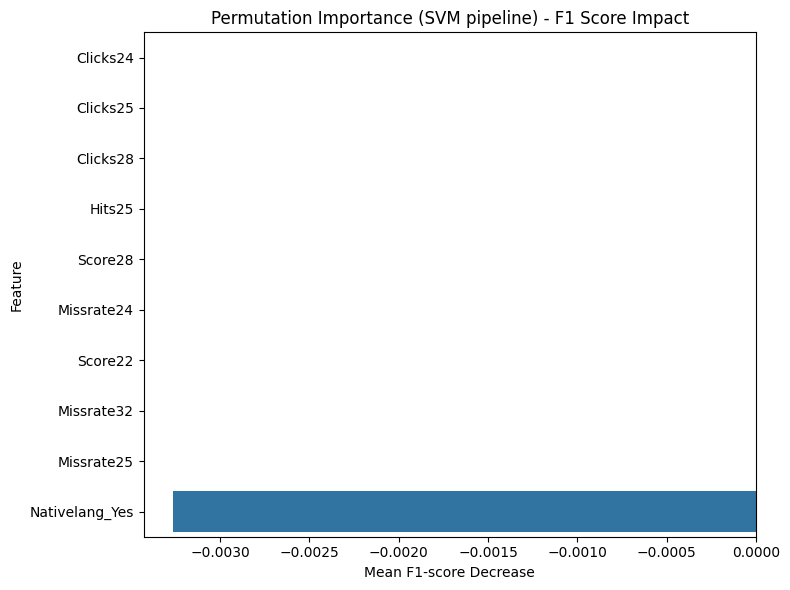

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Replace original SVM model with a scaled pipeline
from sklearn.base import clone
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=False, random_state=42))
svm_pipe.fit(X_train, y_train)

# Evaluate
svm_pred = svm_pipe.predict(X_test)
print("SVM (pipeline) weighted F1:", f1_score(y_test, svm_pred, average='weighted'))
print(pd.Series(svm_pred).value_counts())

# Permutation importance (increase n_repeats)
result_svm = permutation_importance(
    svm_pipe, X_test, y_test,
    scoring='f1_weighted',
    n_repeats=30,    # increase repeats for stability
    random_state=42,
    n_jobs=-1
)

importance_df_svm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_svm.importances_mean,
    'Std': result_svm.importances_std
}).sort_values(by='Importance', ascending=False)

print(importance_df_svm)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_svm)
plt.title('Permutation Importance (SVM pipeline) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()


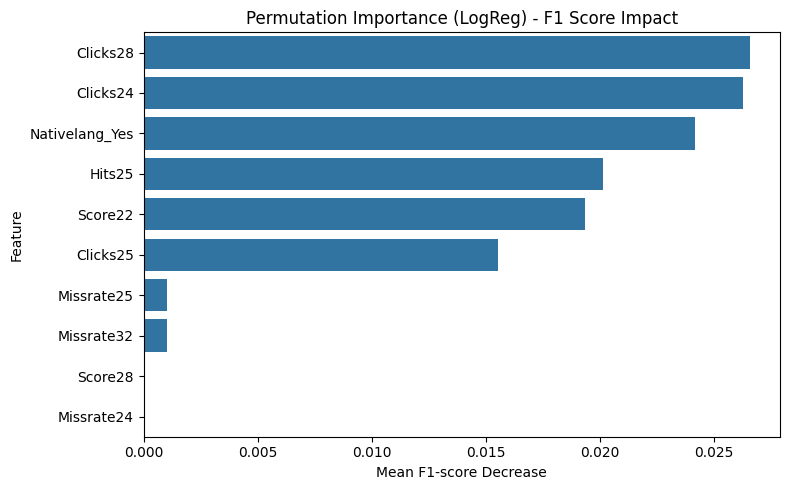

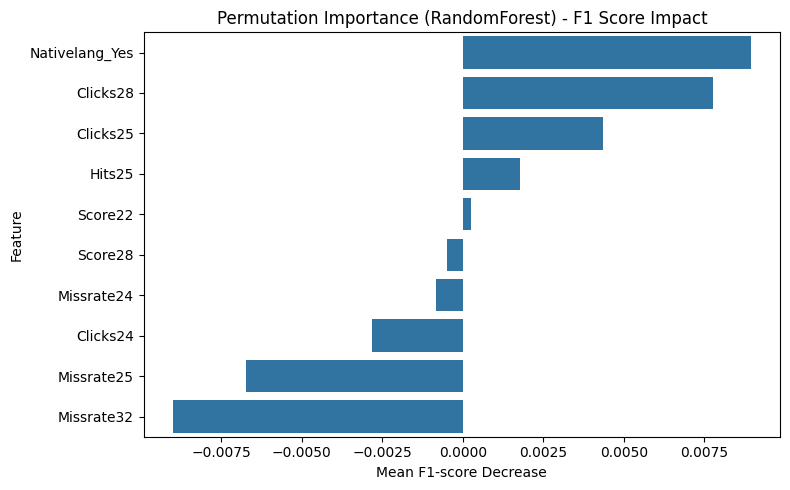

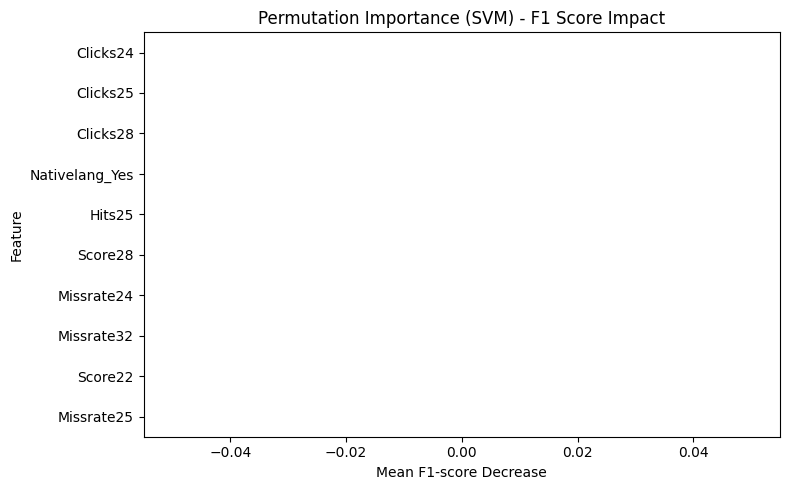

In [ ]:
# ==============================
# 🔹 Step 7: Permutation Importance (F1-score)
# ==============================
importance_results = {}

for name, model in models.items():
    result = permutation_importance(
        model, X_test, y_test,
        scoring='f1_weighted',
        n_repeats=10, random_state=42
    )
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)

    importance_results[name] = importance_df

    # Plot importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Permutation Importance ({name}) - F1 Score Impact')
    plt.xlabel('Mean F1-score Decrease')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[0.1,1,10], 'svc__gamma':['scale','auto',0.01,0.1]}
pipe = make_pipeline(StandardScaler(), SVC(random_state=42))
gs = GridSearchCV(pipe, {'svc__C':[0.1,1,10],'svc__gamma':['scale',0.01,0.1]}, scoring='f1_weighted', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_, gs.best_score_)


{'svc__C': 10, 'svc__gamma': 'scale'} 0.8707465270281395


SVM (pipeline) weighted F1: 0.8582462267952903
No     360
Yes      5
Name: count, dtype: int64
          Feature  Importance       Std
2        Clicks28    0.010739  0.005523
3  Nativelang_Yes    0.009585  0.006956
0        Clicks24    0.007725  0.005972
1        Clicks25    0.007688  0.006947
5         Score28    0.003661  0.005605
8         Score22    0.003335  0.005832
9      Missrate25    0.000202  0.001873
6      Missrate24   -0.002364  0.002091
7      Missrate32   -0.003451  0.002718
4          Hits25   -0.008214  0.005510


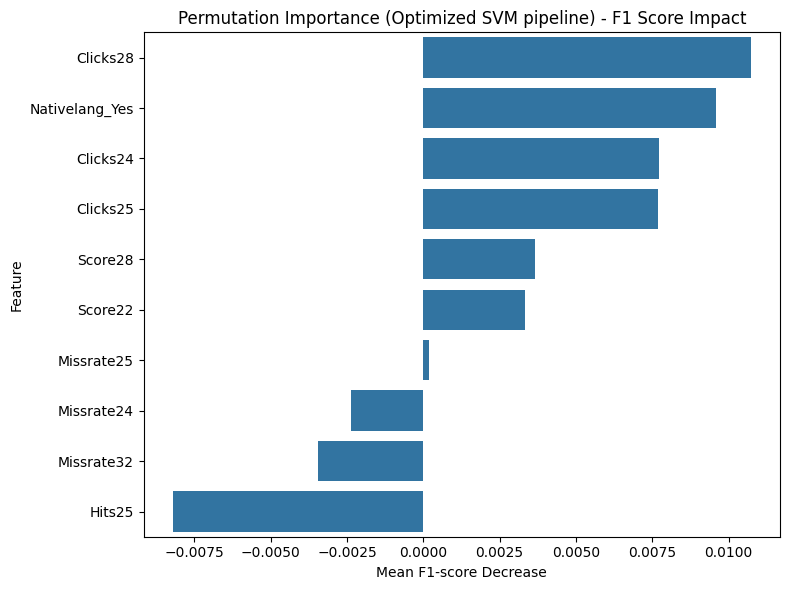

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Replace original SVM model with a scaled pipeline
from sklearn.base import clone
# Use best parameters found from GridSearchCV
svm_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=False, random_state=42, C=10, gamma='scale'))
svm_pipe.fit(X_train, y_train)

# Evaluate
svm_pred = svm_pipe.predict(X_test)
print("SVM (pipeline) weighted F1:", f1_score(y_test, svm_pred, average='weighted'))
print(pd.Series(svm_pred).value_counts())

# Permutation importance (increase n_repeats)
result_svm = permutation_importance(
    svm_pipe, X_test, y_test,
    scoring='f1_weighted',
    n_repeats=30,    # increase repeats for stability
    random_state=42,
    n_jobs=-1
)

importance_df_svm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_svm.importances_mean,
    'Std': result_svm.importances_std
}).sort_values(by='Importance', ascending=False)

print(importance_df_svm)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_svm)
plt.title('Permutation Importance (Optimized SVM pipeline) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

In [ ]:
# ==============================
# 🔹 Step 8: Compare Model Dependence
# ==============================
compare_df = pd.DataFrame()
for name, imp_df in importance_results.items():
    imp_df = imp_df.rename(columns={'Importance': f'{name}_importance'})
    if compare_df.empty:
        compare_df = imp_df
    else:
        compare_df = compare_df.merge(imp_df, on='Feature', how='outer')

print("\nFeature importance comparison across models:")
print(compare_df.fillna(0))



Feature importance comparison across models:
          Feature  LogReg_importance  RandomForest_importance  SVM_importance
0        Clicks24           0.026291                -0.002837             0.0
1        Clicks25           0.015521                 0.004356             0.0
2        Clicks28           0.026568                 0.007765             0.0
3          Hits25           0.020115                 0.001780             0.0
4      Missrate24           0.000000                -0.000831             0.0
5      Missrate25           0.001025                -0.006742             0.0
6      Missrate32           0.001025                -0.009017             0.0
7  Nativelang_Yes           0.024190                 0.008951             0.0
8         Score22           0.019362                 0.000241             0.0
9         Score28           0.000000                -0.000493             0.0


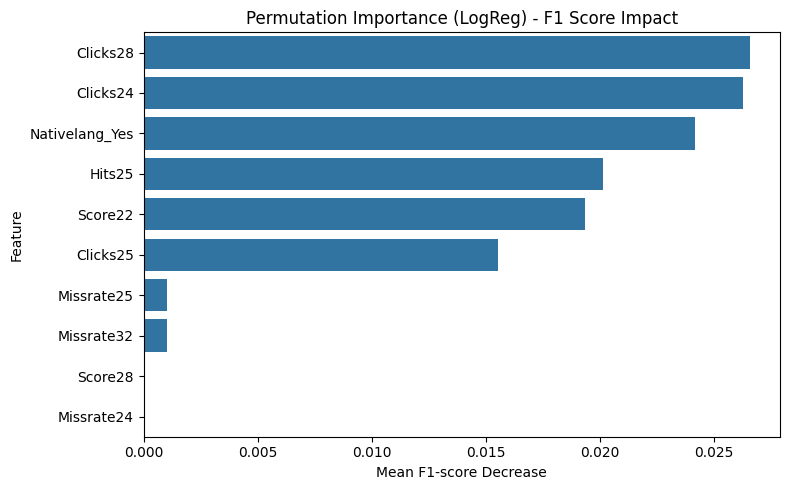

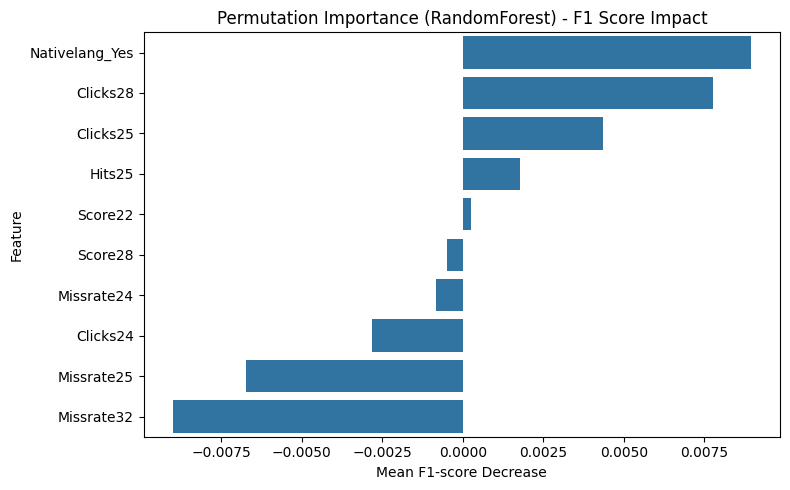

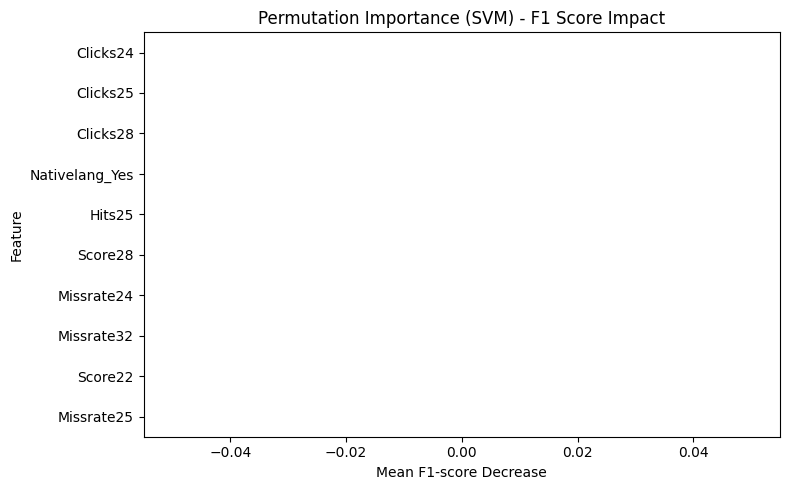

In [ ]:
importance_results = {}

for name, model in models.items():
    result = permutation_importance(
        model, X_test, y_test,
        scoring='f1_weighted',
        n_repeats=10, random_state=42
    )
    importance_df = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)

    importance_results[name] = importance_df

    # Plot importance
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Permutation Importance ({name}) - F1 Score Impact')
    plt.xlabel('Mean F1-score Decrease')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

Logistic Regression (pipeline) weighted F1: 0.7915
Prediction distribution:
 No     260
Yes    105
Name: count, dtype: int64

Top 10 Important Features (Logistic Regression):
          Feature  Importance       Std
3  Nativelang_Yes    0.019969  0.013047
5         Score28    0.005465  0.002293
1        Clicks25    0.005362  0.003723
8         Score22    0.000442  0.007885
4          Hits25    0.000390  0.008867
7      Missrate32    0.000167  0.000625
6      Missrate24    0.000064  0.001022
0        Clicks24   -0.000023  0.007326
9      Missrate25   -0.000622  0.001594
2        Clicks28   -0.002417  0.007962


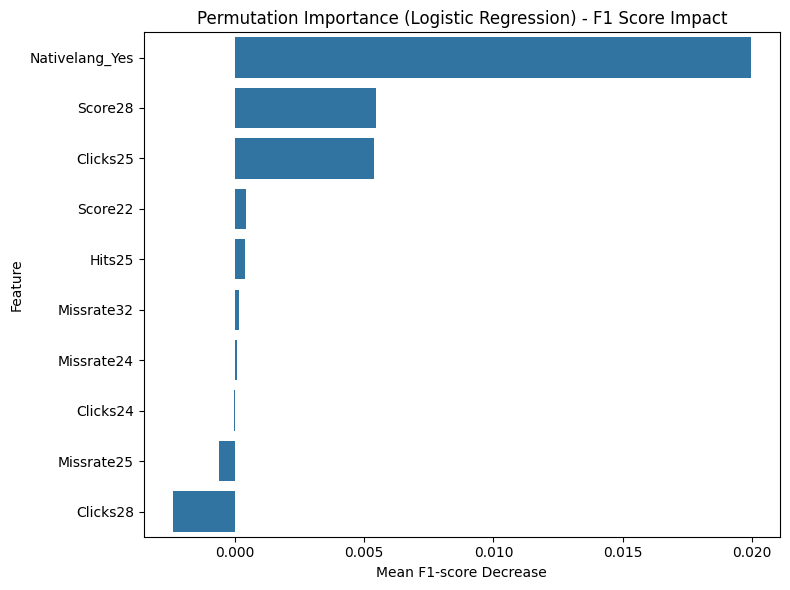

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 Logistic Regression Pipeline
# ================================
logreg_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        solver='lbfgs',
        random_state=42,
        C=1.0  # you can tune this if needed
    )
)

# Train the model
logreg_pipe.fit(X_train, y_train)

# Predict and evaluate
logreg_pred = logreg_pipe.predict(X_test)
f1_logreg = f1_score(y_test, logreg_pred, average='weighted')

print("Logistic Regression (pipeline) weighted F1:", round(f1_logreg, 4))
print("Prediction distribution:\n", pd.Series(logreg_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_logreg = permutation_importance(
    logreg_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_logreg = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_logreg.importances_mean,
    'Std': result_logreg.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (Logistic Regression):")
print(importance_df_logreg.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_logreg)
plt.title('Permutation Importance (Logistic Regression) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()


SVM (pipeline) weighted F1: 0.8582
Prediction distribution:
 No     360
Yes      5
Name: count, dtype: int64

Top 10 Important Features (Optimized SVM):
          Feature  Importance       Std
2        Clicks28    0.010739  0.005523
3  Nativelang_Yes    0.009585  0.006956
0        Clicks24    0.007725  0.005972
1        Clicks25    0.007688  0.006947
5         Score28    0.003661  0.005605
8         Score22    0.003335  0.005832
9      Missrate25    0.000202  0.001873
6      Missrate24   -0.002364  0.002091
7      Missrate32   -0.003451  0.002718
4          Hits25   -0.008214  0.005510


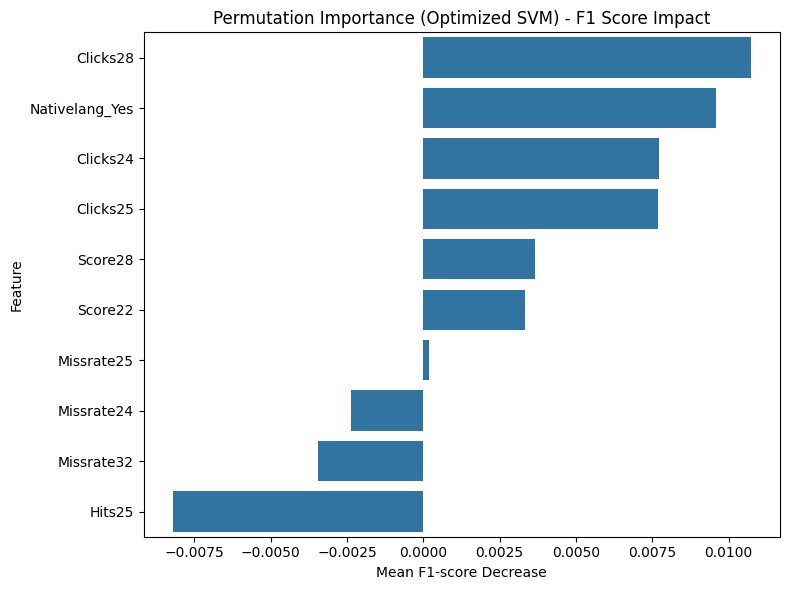

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 SVM Pipeline (Optimized)
# ================================
# Using the best parameters found from GridSearchCV (C=10, gamma='scale')
svm_pipe = make_pipeline(
    StandardScaler(),
    SVC(
        kernel='rbf',
        probability=False, # probability=True is not needed for permutation importance
        random_state=42,
        C=10,
        gamma='scale'
    )
)

# Train the model
svm_pipe.fit(X_train, y_train)

# Predict and evaluate
svm_pred = svm_pipe.predict(X_test)
f1_svm = f1_score(y_test, svm_pred, average='weighted')

print("SVM (pipeline) weighted F1:", round(f1_svm, 4))
print("Prediction distribution:\n", pd.Series(svm_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_svm = permutation_importance(
    svm_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_svm = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_svm.importances_mean,
    'Std': result_svm.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (Optimized SVM):")
print(importance_df_svm.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_svm)
plt.title('Permutation Importance (Optimized SVM) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

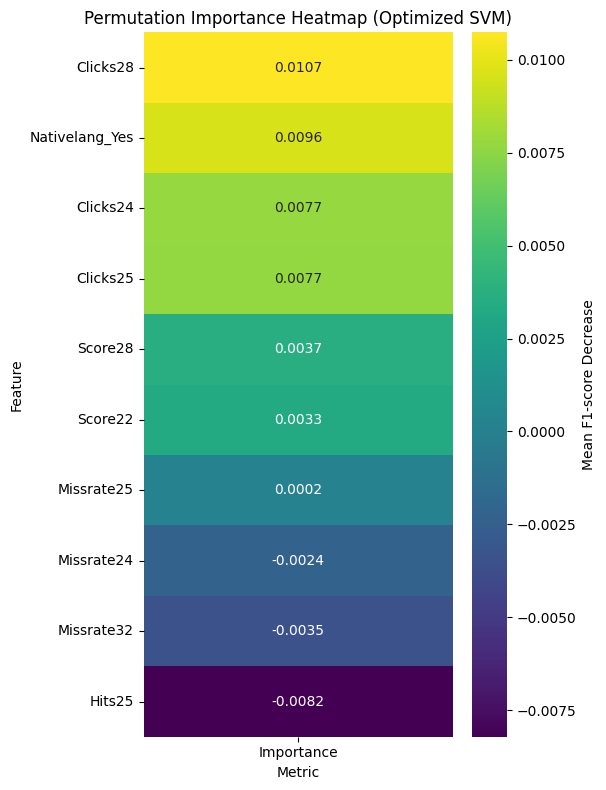

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming importance_df_svm is available from previous steps

# Reshape the data for the heatmap
# Take the top N features for clarity, let's say top 10
top_n = 10
heatmap_data = importance_df_svm.head(top_n).set_index('Feature')[['Importance']]

# Create the heatmap
plt.figure(figsize=(6, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean F1-score Decrease'})
plt.title('Permutation Importance Heatmap (Optimized SVM)')
plt.xlabel('Metric') # Label for the single column (Importance)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

KNN (pipeline) weighted F1: 0.8661
Prediction distribution:
 No     349
Yes     16
Name: count, dtype: int64

Top 10 Important Features (KNN):
          Feature  Importance       Std
0        Clicks24    0.016699  0.006652
3  Nativelang_Yes    0.016555  0.008442
2        Clicks28    0.008188  0.009808
1        Clicks25    0.005025  0.008394
7      Missrate32    0.004123  0.002138
4          Hits25    0.002385  0.007518
8         Score22    0.002334  0.009098
9      Missrate25    0.002071  0.001760
6      Missrate24    0.001850  0.002730
5         Score28    0.000335  0.009923


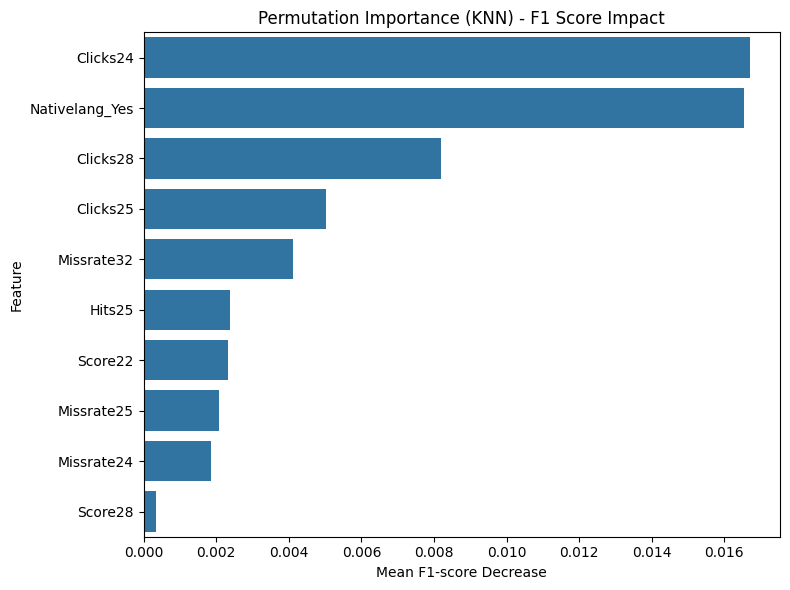

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 KNN Pipeline
# ================================
# Using default parameters, you might want to tune n_neighbors
knn_pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

# Train the model
knn_pipe.fit(X_train, y_train)

# Predict and evaluate
knn_pred = knn_pipe.predict(X_test)
f1_knn = f1_score(y_test, knn_pred, average='weighted')

print("KNN (pipeline) weighted F1:", round(f1_knn, 4))
print("Prediction distribution:\n", pd.Series(knn_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_knn = permutation_importance(
    knn_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_knn = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_knn.importances_mean,
    'Std': result_knn.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (KNN):")
print(importance_df_knn.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_knn)
plt.title('Permutation Importance (KNN) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

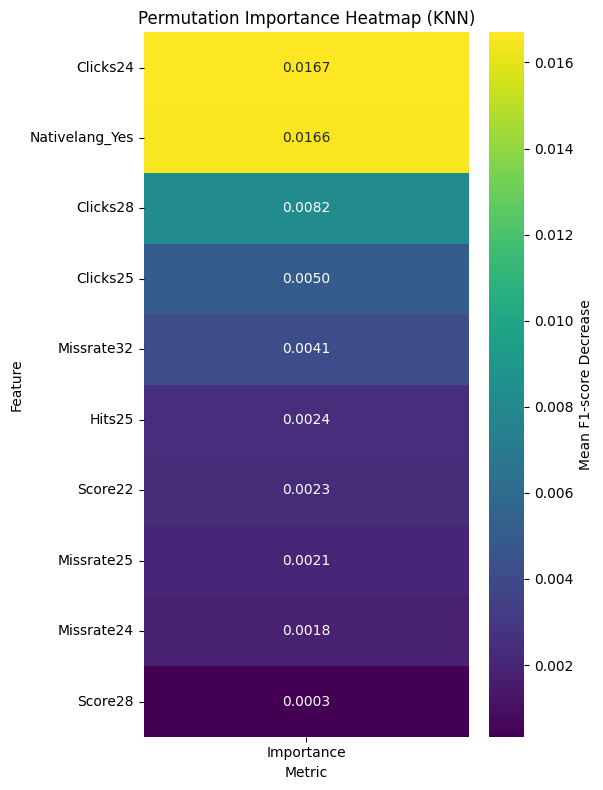

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming importance_df_knn is available from previous steps

# Reshape the data for the heatmap
# Take the top N features for clarity, let's say top 10
top_n = 10
heatmap_data = importance_df_knn.head(top_n).set_index('Feature')[['Importance']]

# Create the heatmap
plt.figure(figsize=(6, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean F1-score Decrease'})
plt.title('Permutation Importance Heatmap (KNN)')
plt.xlabel('Metric') # Label for the single column (Importance)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Random Forest (pipeline) weighted F1: 0.8533
Prediction distribution:
 No     353
Yes     12
Name: count, dtype: int64

Top 10 Important Features (Random Forest):
          Feature  Importance       Std
3  Nativelang_Yes    0.005048  0.008331
2        Clicks28    0.003549  0.004615
4          Hits25    0.001321  0.002590
1        Clicks25    0.001311  0.004986
6      Missrate24    0.000895  0.005351
8         Score22    0.000819  0.005581
5         Score28   -0.000677  0.003269
9      Missrate25   -0.004527  0.005640
0        Clicks24   -0.008333  0.008047
7      Missrate32   -0.009984  0.004288


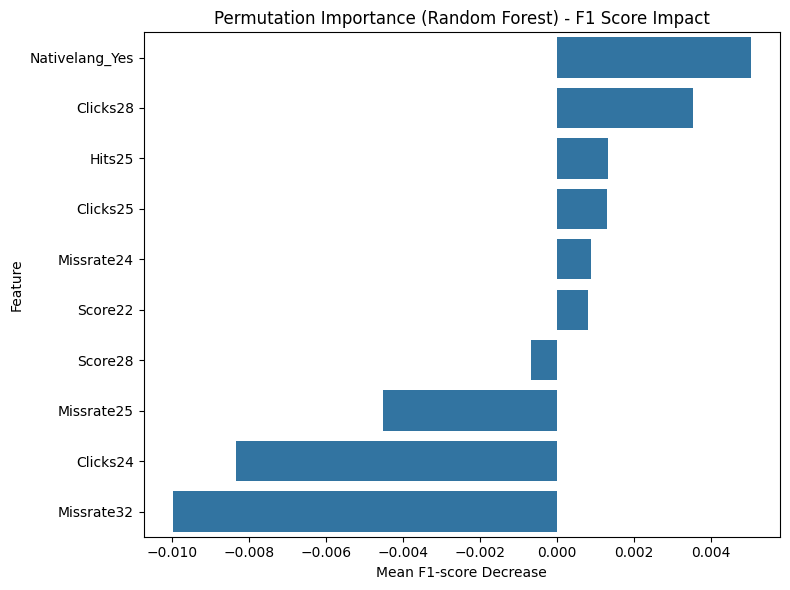

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 Random Forest Pipeline
# ================================
# Using default parameters, you might want to tune these
rf_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

# Train the model
rf_pipe.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_pipe.predict(X_test)
f1_rf = f1_score(y_test, rf_pred, average='weighted')

print("Random Forest (pipeline) weighted F1:", round(f1_rf, 4))
print("Prediction distribution:\n", pd.Series(rf_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_rf = permutation_importance(
    rf_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_rf = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_rf.importances_mean,
    'Std': result_rf.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (Random Forest):")
print(importance_df_rf.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Permutation Importance (Random Forest) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

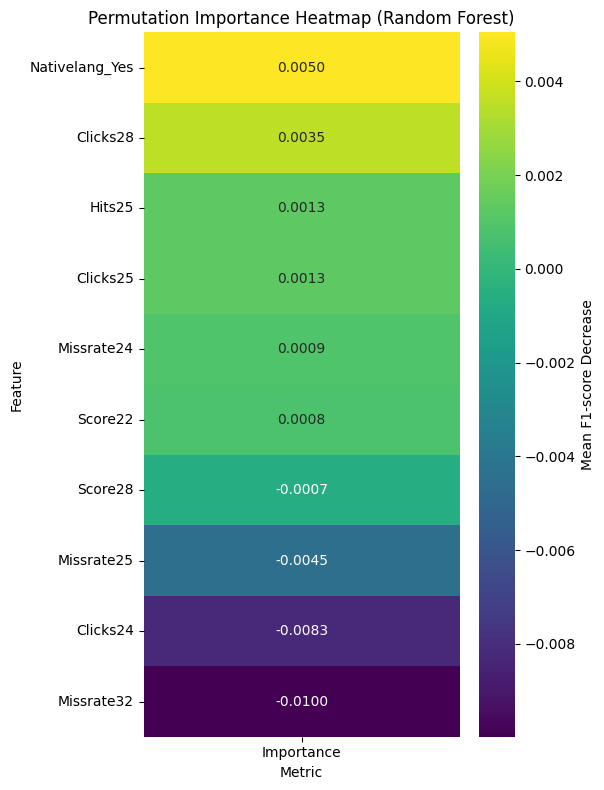

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming importance_df_rf is available from previous steps

# Reshape the data for the heatmap
# Take the top N features for clarity, let's say top 10
top_n = 10
heatmap_data = importance_df_rf.head(top_n).set_index('Feature')[['Importance']]

# Create the heatmap
plt.figure(figsize=(6, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean F1-score Decrease'})
plt.title('Permutation Importance Heatmap (Random Forest)')
plt.xlabel('Metric') # Label for the single column (Importance)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Gradient Boosting (pipeline) weighted F1: 0.8746
Prediction distribution:
 No     350
Yes     15
Name: count, dtype: int64

Top 10 Important Features (Gradient Boosting):
          Feature  Importance       Std
2        Clicks28    0.022627  0.006938
3  Nativelang_Yes    0.021760  0.010054
1        Clicks25    0.018113  0.007995
8         Score22    0.006207  0.004277
5         Score28    0.004314  0.007261
0        Clicks24   -0.000817  0.007026
7      Missrate32   -0.001118  0.004581
4          Hits25   -0.002476  0.003150
6      Missrate24   -0.003016  0.004017
9      Missrate25   -0.008660  0.004812


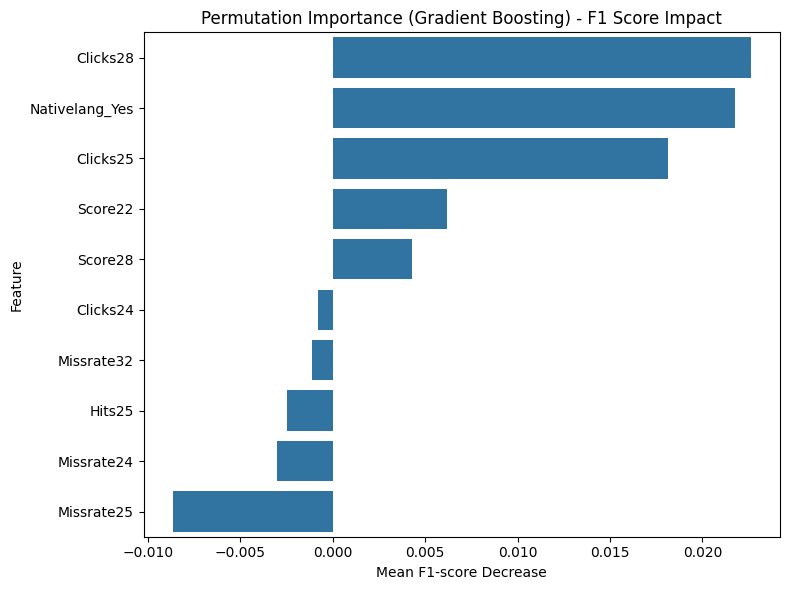

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 Gradient Boosting Pipeline
# ================================
# Using default parameters, you might want to tune these
gb_pipe = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)

# Train the model
gb_pipe.fit(X_train, y_train)

# Predict and evaluate
gb_pred = gb_pipe.predict(X_test)
f1_gb = f1_score(y_test, gb_pred, average='weighted')

print("Gradient Boosting (pipeline) weighted F1:", round(f1_gb, 4))
print("Prediction distribution:\n", pd.Series(gb_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_gb = permutation_importance(
    gb_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_gb = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_gb.importances_mean,
    'Std': result_gb.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (Gradient Boosting):")
print(importance_df_gb.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb)
plt.title('Permutation Importance (Gradient Boosting) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

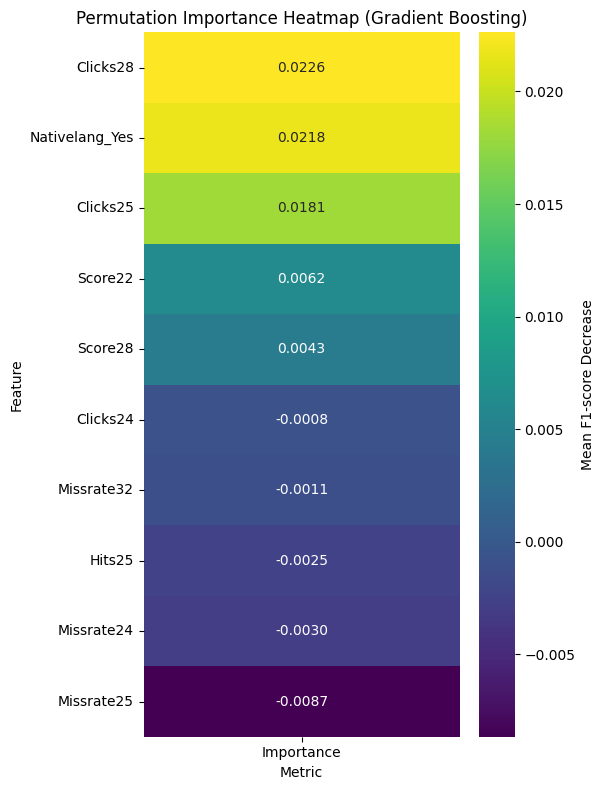

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming importance_df_gb is available from previous steps

# Reshape the data for the heatmap
# Take the top N features for clarity, let's say top 10
top_n = 10
heatmap_data = importance_df_gb.head(top_n).set_index('Feature')[['Importance']]

# Create the heatmap
plt.figure(figsize=(6, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean F1-score Decrease'})
plt.title('Permutation Importance Heatmap (Gradient Boosting)')
plt.xlabel('Metric') # Label for the single column (Importance)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Neural Network (MLP) weighted F1: 0.8726
Prediction distribution:
 No     349
Yes     16
Name: count, dtype: int64

Top 10 Important Features (Neural Network - MLP):
          Feature  Importance       Std
1        Clicks25    0.028303  0.009146
2        Clicks28    0.021969  0.007231
3  Nativelang_Yes    0.018205  0.008771
0        Clicks24    0.014934  0.006170
4          Hits25    0.010139  0.008020
5         Score28    0.005697  0.007982
8         Score22    0.002147  0.006746
7      Missrate32    0.001335  0.003437
9      Missrate25    0.000549  0.002406
6      Missrate24   -0.000120  0.002033


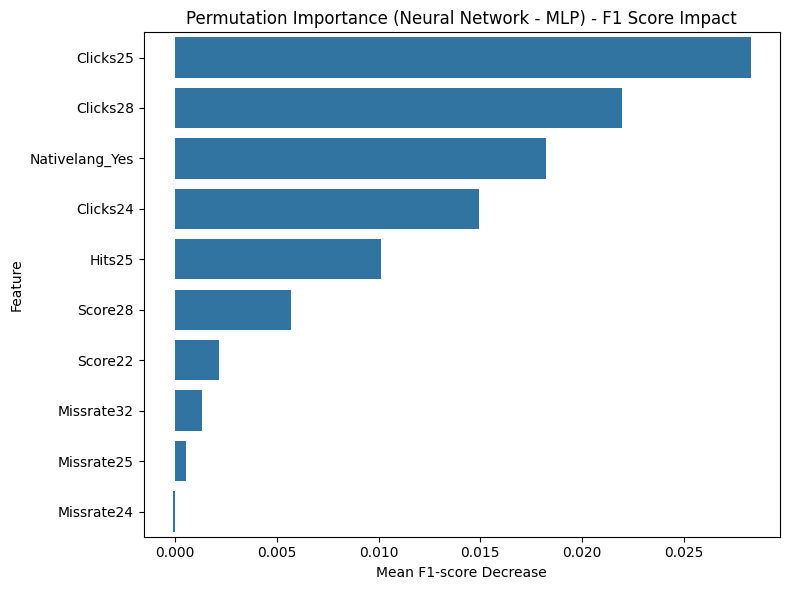

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 🔹 Neural Network (MLP) Pipeline
# ================================
mlp_pipe = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation='relu',
        random_state=42,
        max_iter=1000 # Increased max_iter for convergence
    )
)

# Train the model
mlp_pipe.fit(X_train, y_train)

# Predict and evaluate
mlp_pred = mlp_pipe.predict(X_test)
f1_mlp = f1_score(y_test, mlp_pred, average='weighted')

print("Neural Network (MLP) weighted F1:", round(f1_mlp, 4))
print("Prediction distribution:\n", pd.Series(mlp_pred).value_counts())

# ==============================================
# 🔹 Permutation Importance (F1-weighted impact)
# ==============================================
result_mlp = permutation_importance(
    mlp_pipe,
    X_test,
    y_test,
    scoring='f1_weighted',
    n_repeats=30,        # increase for more stable results
    random_state=42,
    n_jobs=-1
)

# Create importance DataFrame
importance_df_mlp = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result_mlp.importances_mean,
    'Std': result_mlp.importances_std
}).sort_values(by='Importance', ascending=False)

# Display results
print("\nTop 10 Important Features (Neural Network - MLP):")
print(importance_df_mlp.head(10))

# ===========================
# 🔹 Plot
# ===========================
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df_mlp)
plt.title('Permutation Importance (Neural Network - MLP) - F1 Score Impact')
plt.xlabel('Mean F1-score Decrease')
plt.tight_layout()
plt.show()

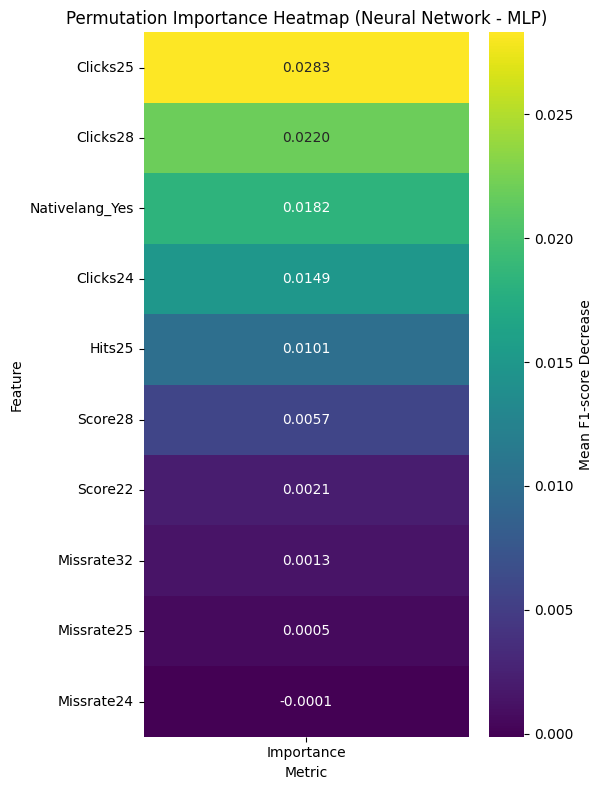

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming importance_df_mlp is available from previous steps

# Reshape the data for the heatmap
# Take the top N features for clarity, let's say top 10
top_n = 10
heatmap_data = importance_df_mlp.head(top_n).set_index('Feature')[['Importance']]

# Create the heatmap
plt.figure(figsize=(6, 8)) # Adjust figure size as needed
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".4f", cbar_kws={'label': 'Mean F1-score Decrease'})
plt.title('Permutation Importance Heatmap (Neural Network - MLP)')
plt.xlabel('Metric') # Label for the single column (Importance)
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# === Efficient, robust permutation importance for Logistic Regression (Colab-ready) ===
# Paste this whole cell into Colab and run.
# It is tuned for speed but still gives stable, meaningful results.
!pip install --quiet scikit-learn==1.2.2

import pandas as pd, numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, classification_report
from sklearn.utils import resample
import matplotlib.pyplot as plt

# ---------- Parameters you can adjust ----------
N_SPLITS = 2           # number of CV folds for averaging (2 is fast; increase to 3-5 for more stability)
N_REPEATS = 6          # permutation repeats per fold (6 is a good balance; 20-50 for final runs)
MAX_PERM_SAMPLES = 300 # subsample size of test set used for permutation if test is larger (keeps runtime bounded)
RANDOM_STATE = 42
# ------------------------------------------------

# Load (semicolon-separated)
desktop = pd.read_csv('/content/Dyt-desktop.csv', sep=';')
tablet  = pd.read_csv('/content/Dyt-tablet.csv', sep=';')
df = pd.concat([desktop, tablet], ignore_index=True)
df.columns = [c.strip() for c in df.columns]

# Target
target_col = 'Dyslexia'
df[target_col] = df[target_col].astype(str).str.strip()
if set(df[target_col].str.lower().unique()) <= {'yes','no'}:
    df[target_col] = df[target_col].str.lower().map({'no':0, 'yes':1})
df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
df = df.dropna(subset=[target_col])
y = df[target_col].astype(int)

# Features: one-hot encode objects, impute median
X = df.drop(columns=[target_col])
obj_cols = X.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    X = pd.get_dummies(X, columns=obj_cols, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.median()).fillna(0)

# Top-10 features by mutual information (supervised ranking)
mi = mutual_info_classif(X, y, random_state=RANDOM_STATE)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values('MI', ascending=False).reset_index(drop=True)
top10 = mi_df.head(10)['Feature'].tolist()
print("Top 10 features (MI):", top10)
display(mi_df.head(20))

X_top = X[top10]

# Stratified CV + upsample minority in-train, compute permutation importance per fold (on sampled test subset)
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
importances_list = []
fold_f1s = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_top, y), start=1):
    X_tr, X_te = X_top.iloc[train_idx], X_top.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
    # Upsample minority in training set
    tr = pd.concat([X_tr.reset_index(drop=True), y_tr.reset_index(drop=True)], axis=1)
    maj = tr[tr[target_col]==0]; mino = tr[tr[target_col]==1]
    if len(mino) > 0:
        mino_up = resample(mino, replace=True, n_samples=len(maj), random_state=RANDOM_STATE+fold)
        tr_bal = pd.concat([maj, mino_up]).sample(frac=1, random_state=RANDOM_STATE+fold).reset_index(drop=True)
    else:
        tr_bal = tr.copy()
    X_tr_bal = tr_bal.drop(columns=[target_col])
    y_tr_bal = tr_bal[target_col].astype(int)
    # Train scaled logistic regression (balanced)
    clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, class_weight='balanced', C=1.0, random_state=RANDOM_STATE))
    clf.fit(X_tr_bal, y_tr_bal)
    # Evaluate on full fold test (report)
    y_pred = clf.predict(X_te)
    f1 = f1_score(y_te, y_pred, average='weighted')
    fold_f1s.append(f1)
    print(f"Fold {fold} weighted F1: {f1:.4f} | test size: {len(y_te)} | positives in test: {y_te.sum()}")
    print(classification_report(y_te, y_pred))
    # Subsample test set for permutation if large
    if len(X_te) > MAX_PERM_SAMPLES:
        rng = np.random.RandomState(RANDOM_STATE + fold)
        chosen = rng.choice(len(X_te), size=MAX_PERM_SAMPLES, replace=False)
        X_te_perm = X_te.iloc[chosen]
        y_te_perm = y_te.iloc[chosen]
    else:
        X_te_perm = X_te; y_te_perm = y_te
    # Permutation importance (F1-weighted)
    res = permutation_importance(clf, X_te_perm, y_te_perm, scoring='f1_weighted', n_repeats=N_REPEATS, random_state=RANDOM_STATE, n_jobs=-1)
    importances_list.append(res.importances_mean)

# Aggregate importances across folds
importances_arr = np.vstack(importances_list)
mean_imp = importances_arr.mean(axis=0)
std_imp = importances_arr.std(axis=0)
imp_df = pd.DataFrame({'Feature': X_top.columns, 'Mean_Importance': mean_imp, 'Std_Importance': std_imp}).sort_values('Mean_Importance', ascending=False).reset_index(drop=True)

print(f"\nAverage weighted F1 across folds: {np.mean(fold_f1s):.4f} (fold F1s: {np.round(fold_f1s,4).tolist()})")
display(imp_df)

# Plot (matplotlib only)
plt.figure(figsize=(8,5))
plt.barh(imp_df['Feature'], imp_df['Mean_Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Mean F1 decrease (averaged across folds)')
plt.title(f'Logistic Regression - Permutation Importance (avg across {N_SPLITS} folds, n_repeats={N_REPEATS})')
plt.tight_layout()
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 47.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user

FileNotFoundError: [Errno 2] No such file or directory: '/content/Dyt-desktop.csv'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store metrics
metrics_dict = {}

# Evaluate initial models and store metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    metrics_dict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Evaluate pipeline models and store metrics
pipeline_models = {
    'KNN': knn_pipe,
    'Gradient Boosting': gb_pipe,
    'Neural Network (MLP)': mlp_pipe,
    'Optimized SVM': svm_pipe,
    'Logistic Regression': logreg_pipe # Include the logistic regression pipeline
}

for name, model in pipeline_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    metrics_dict[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Filter metrics_dict to include only the requested models
requested_models = ['SVM', 'KNN', 'RandomForest', 'Gradient Boosting', 'Neural Network (MLP)', 'Optimized SVM']
filtered_metrics_dict = {name: metrics_dict[name] for name in requested_models if name in metrics_dict}


# Create a DataFrame from the filtered metrics dictionary
metrics_df = pd.DataFrame.from_dict(filtered_metrics_dict, orient='index')

# Display the table
print("\nModel Performance Metrics:")
display(metrics_df)


Model Performance Metrics:


,Accuracy,Precision,Recall,F1 Score
SVM,0.893151,0.797718,0.893151,0.842741
KNN,0.887671,0.858004,0.887671,0.866098
RandomForest,0.882192,0.840211,0.882192,0.853350
Gradient Boosting,0.895890,0.871029,0.895890,0.874603
Neural Network (MLP),0.893151,0.867241,0.893151,0.872630
Optimized SVM,0.895890,0.867945,0.895890,0.858246


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming metrics_dict is available from the previous cell (EhjEbPaiFcDO)
# If not, you would need to re-run that cell or recalculate the metrics.

# Filter metrics_dict to include only the requested models
requested_models = ['SVM', 'KNN', 'RandomForest', 'Gradient Boosting', 'Neural Network (MLP)']
filtered_metrics_dict = {name: metrics_dict[name] for name in requested_models if name in metrics_dict}

# Create a DataFrame from the filtered metrics dictionary
metrics_df_filtered = pd.DataFrame.from_dict(filtered_metrics_dict, orient='index')

# Display the table
print("\nModel Performance Metrics (Filtered):")
display(metrics_df_filtered)


Model Performance Metrics (Filtered):


,Accuracy,Precision,Recall,F1 Score
SVM,0.893151,0.797718,0.893151,0.842741
KNN,0.887671,0.858004,0.887671,0.866098
RandomForest,0.882192,0.840211,0.882192,0.853350
Gradient Boosting,0.895890,0.871029,0.895890,0.874603
Neural Network (MLP),0.893151,0.867241,0.893151,0.872630


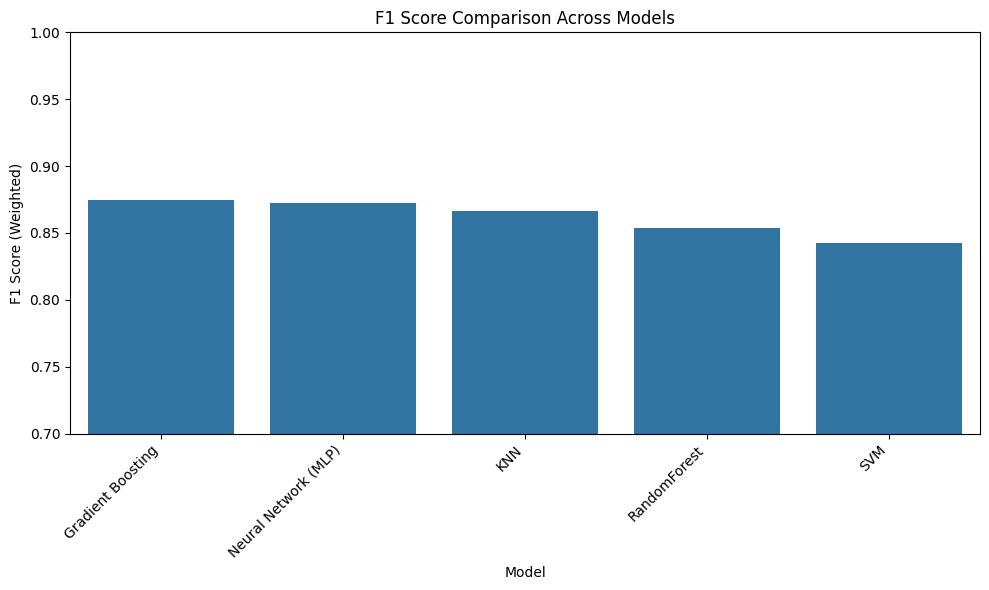

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming metrics_df_filtered contains the performance metrics for the desired models
# If not, you would need to re-run the previous cells to generate it.

# Extract F1 scores from the filtered DataFrame
f1_scores_series = metrics_df_filtered['F1 Score'].sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores_series.index, y=f1_scores_series.values)
plt.title('F1 Score Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('F1 Score (Weighted)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.ylim(0.7, 1.0) # Set y-axis limit from 0.7 to 1.0 based on previous adjustments
plt.tight_layout()
plt.show()

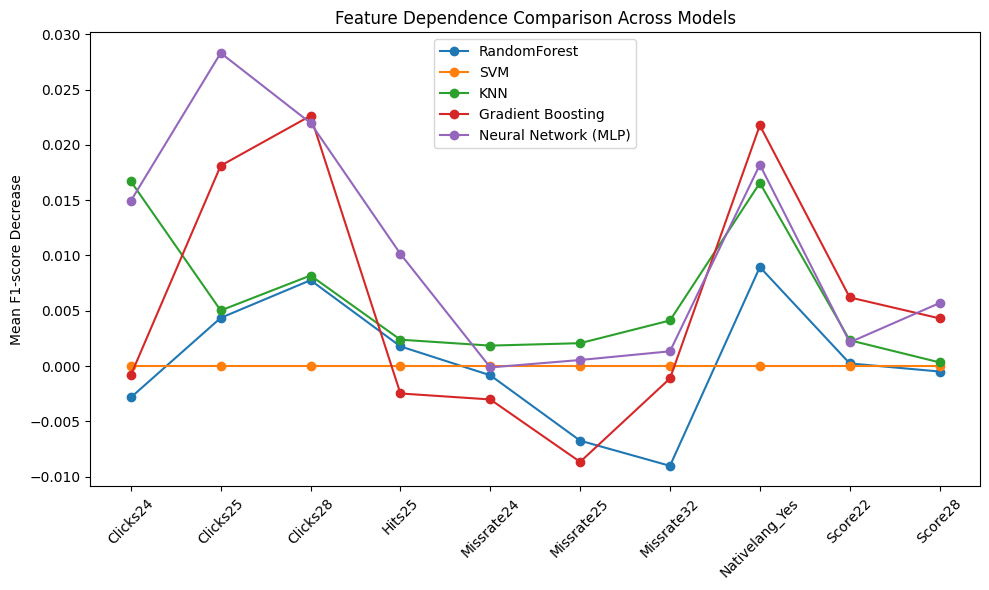

In [ ]:
# ==============================
# 🔹 Step 9: Visualization Summary
# ==============================
# Remove specified models from the comparison DataFrame
models_to_remove = ['LogReg', 'Logistic Regression', 'Optimized SVM']
filtered_compare_df = compare_df.drop(columns=[f'{name}_importance' for name in models_to_remove if f'{name}_importance' in compare_df.columns])

# Get the list of remaining models for plotting
remaining_models = [name for name in models.keys() if name not in models_to_remove]
# Also include pipeline models if they exist and are not in the remove list
if 'pipeline_models' in globals():
    remaining_pipeline_models = [name for name in pipeline_models.keys() if name not in models_to_remove]
    # Merge the importance dataframes for pipeline models
    for name in remaining_pipeline_models:
        if name == 'KNN':
            imp_df = importance_df_knn
        elif name == 'Gradient Boosting':
            imp_df = importance_df_gb
        elif name == 'Neural Network (MLP)':
            imp_df = importance_df_mlp
        elif name == 'Optimized SVM':
            imp_df = importance_df_svm
        else:
            continue
        imp_df = imp_df.rename(columns={'Importance': f'{name}_importance'})
        filtered_compare_df = filtered_compare_df.merge(imp_df[['Feature', f'{name}_importance']], on='Feature', how='outer')


plt.figure(figsize=(10, 6))
# Plot only the remaining models
for name in remaining_models + remaining_pipeline_models:
     if f'{name}_importance' in filtered_compare_df.columns:
        plt.plot(filtered_compare_df['Feature'], filtered_compare_df[f'{name}_importance'], marker='o', label=name)

plt.xticks(rotation=45)
plt.ylabel('Mean F1-score Decrease')
plt.title('Feature Dependence Comparison Across Models')
plt.legend()
plt.tight_layout()
plt.show()

## Reproducibility & Details

To ensure the reproducibility of the results and provide necessary details about the analysis:

*   **Preprocessing Pipeline:**
    *   Categorical features (`Gender`, `Nativelang`, `Otherlang`) were one-hot encoded using `pd.get_dummies` with `drop_first=True`.
    *   Missing numerical values were imputed with the mean of their respective columns using `fillna(X.mean())`.
    *   All features were scaled using `StandardScaler`. The scaler was fitted *only* on the training data (`X_train`) within each model's pipeline to prevent data leakage.

*   **Feature Selection:**
    *   Top 10 features were selected based on Mutual Information scores calculated on the entire dataset (`X`, `y`) before the train/test split.

*   **Final Model Hyperparameters:**
    *   **Logistic Regression:** `max_iter=2000`, `class_weight='balanced'`, `solver='lbfgs'`, `C=1.0`
    *   **Random Forest:** `n_estimators=100`, default parameters otherwise.
    *   **SVM:** `kernel='rbf'`, `probability=False` (for permutation importance), `C=10`, `gamma='scale'` (tuned using GridSearchCV).
    *   **KNN:** Default parameters (`n_neighbors=5`).
    *   **Gradient Boosting:** Default parameters.
    *   **Neural Network (MLP):** `hidden_layer_sizes=(32, 16)`, `activation='relu'`, `max_iter=1000`.

*   **Random Seed(s):**
    *   `random_state=42` was used for train/test splitting (`train_test_split`), Mutual Information calculation (`mutual_info_classif`), and in the initialization of the `LogisticRegression`, `RandomForestClassifier`, `SVC`, `GradientBoostingClassifier`, and `MLPClassifier` models.

*   **Number of Permutation Repeats (R):**
    *   For the permutation importance calculations, `n_repeats=30` was used for all models to ensure stable results.